In [241]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [242]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.python.keras import layers

print(tf.__version__)

2.9.1


In [243]:
column_names = ["Date","Maximum","Minimum","Average","Departure","HDD","CDD","Precipitation","New Snow","Snow Depth"]

raw_7_2020 = pd.read_csv("D:\\Desktop\\IRP\\2020july.csv", names=column_names, na_values=["M","T"], comment='\t', sep=',', skipinitialspace=True)
raw_7_2021 = pd.read_csv("D:\\Desktop\\IRP\\2021july.csv", names=column_names, na_values=["M","T"], comment='\t', sep=',', skipinitialspace=True)

In [244]:
dataset2020 = raw_7_2020.copy()
dataset2021 = raw_7_2021.copy()

In [245]:
dataset2020 = dataset2020.dropna()
dataset2021 = dataset2021.dropna()

In [246]:
train_dataset = dataset2020.sample(frac=1.0, random_state=0)
test_dataset = dataset2021.sample(frac=1.0, random_state=0)

In [247]:
train_dataset = train_dataset.drop(index=0)
test_dataset = test_dataset.drop(index=0)

train_dataset.sort_values(by=['Date'])
test_dataset.sort_values(by=['Date'])

,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
1,182,93,67,80,7,0,15,0.52,0,0
2,183,82,64,73,-0.1,0,8,0.55,0,0
3,184,79,54,66.5,-6.7,0,2,0,0,0
4,185,76,56,66,-7.3,0,1,0.11,0,0
5,186,88,60,74,0.6,0,9,0,0,0
8,189,93,68,80.5,6.8,0,16,0,0,0
11,192,82,59,70.5,-3.4,0,6,0.08,0,0
13,194,91,63,77,3,0,12,0.33A,0,0
14,195,93,67,80,6,0,15,0,0,0
16,197,93,64,78.5,4.5,0,14,0,0,0


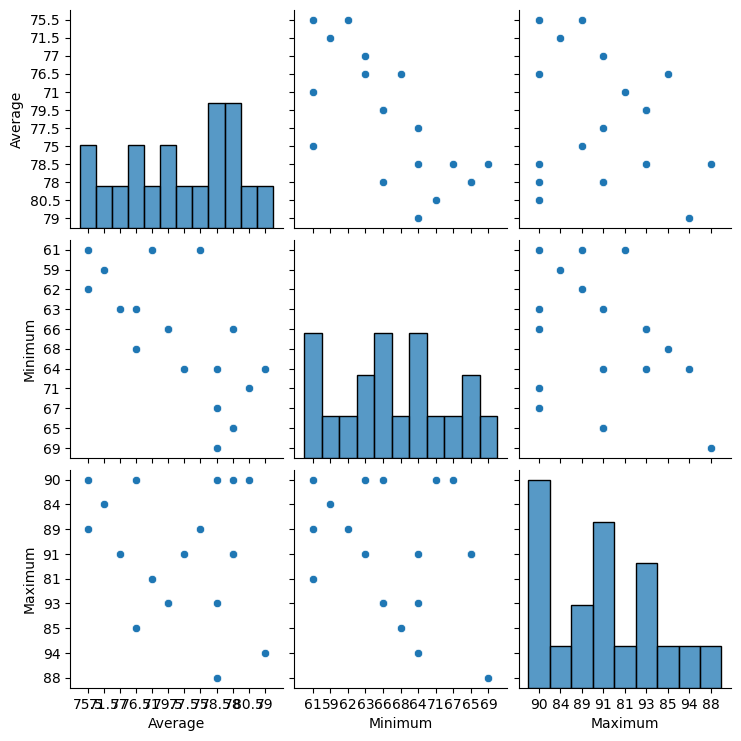

In [248]:
sns.pairplot(data=train_dataset, vars=['Average', 'Minimum', 'Maximum'])

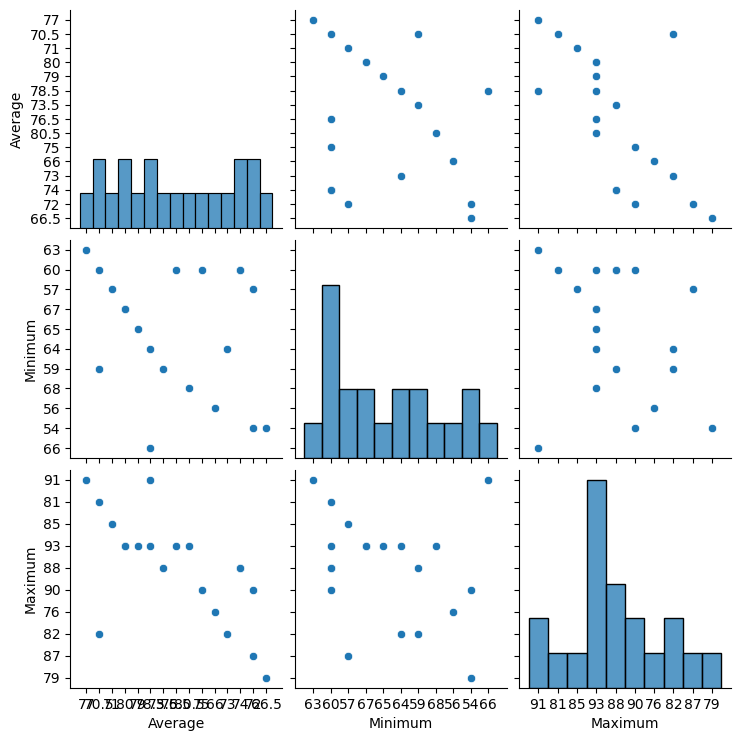

In [249]:
sns.pairplot(data=test_dataset, vars=['Average', 'Minimum', 'Maximum'])

In [250]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Average')
test_labels = test_dataset.pop('Average')

In [251]:
normalizer = tf.keras.layers.Normalization(axis=1)

In [252]:
nptrain_features = np.array(train_features.sort_values(by=['Date']), dtype=float)
nptrain_labels = np.array(train_labels, dtype=float)
normalizer.adapt(nptrain_features)
print(normalizer.mean.numpy())


[[197.789  89.632  64.474   3.316   0.     12.368   0.109   0.      0.   ]]


In [253]:
first = nptrain_features

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[183.    84.    59.    -1.6    0.     7.     0.     0.     0.  ]
 [184.    89.    61.     1.8    0.    10.     0.     0.     0.  ]
 [185.    91.    65.     4.7    0.    13.     0.     0.     0.  ]
 [186.    91.    64.     4.1    0.    13.     0.     0.     0.  ]
 [187.    93.    64.     5.     0.    14.     0.     0.     0.  ]
 [188.    93.    66.     5.9    0.    15.     0.     0.     0.  ]
 [189.    90.    67.     4.8    0.    14.     0.02   0.     0.  ]
 [191.    91.    63.     3.2    0.    12.     0.     0.     0.  ]
 [198.    90.    71.     6.5    0.    16.     0.24   0.     0.  ]
 [199.    90.    63.     2.4    0.    12.     0.     0.     0.  ]
 [200.    94.    64.     4.9    0.    14.     0.     0.     0.  ]
 [205.    88.    69.     4.5    0.    14.     0.28   0.     0.  ]
 [206.    85.    68.     2.5    0.    12.     0.14   0.     0.  ]
 [207.    90.    66.     4.1    0.    13.     0.     0.     0.  ]
 [208.    91.    65.     4.1    0.    13.     0.     0.     0

In [254]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(nptrain_features[:10])

1/1 [==============================] - 0s 44ms/step


array([[ 1.444],
       [ 0.765],
       [ 0.381],
       [ 0.398],
       [ 0.143],
       [ 0.06 ],
       [ 0.325],
       [ 0.328],
       [-0.497],
       [ 0.243]], dtype=float32)

In [255]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [256]:
%%time
history = linear_model.fit(
    nptrain_features,
    nptrain_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 2.95 s
Wall time: 2.54 s


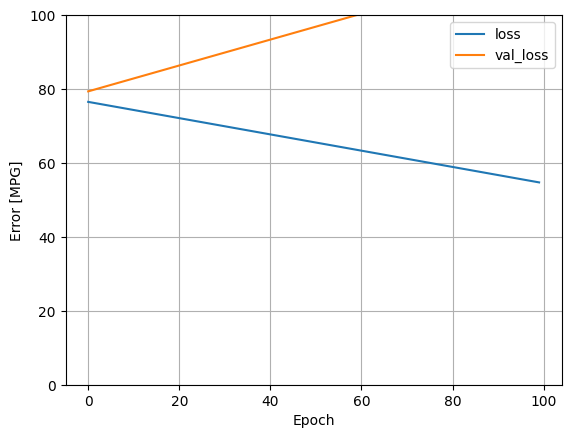

In [260]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
